In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns', 500)

# Check Point Data

In [2]:
#Importing data
check_point = pd.read_excel('Checkpoint_count.xlsx')
check_point.head()

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,check_point8,check_point9,check_point10,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
0,2015-01-01 00:00:00,00:00:00,58,12,4,17,33.0,49,21,16,16,NaN,7,NaN,58,91,24,3,NaN,17,78,21,6
1,2015-02-01 00:00:00,00:00:00,75,7,5,15,30.0,113,27,9,32,NaN,11,NaN,109,177,32,13,NaN,11,57,77,4
2,2015-03-01 00:00:00,00:00:00,79,7,3,7,30.0,107,36,12,18,NaN,2,NaN,71,131,33,5,NaN,14,174,40,5
3,2015-04-01 00:00:00,00:00:00,10,1,21,0,10.0,35,29,1,0,NaN,0,NaN,6,11,6,1,NaN,1,20,6,0
4,2015-05-01 00:00:00,00:00:00,42,0,2,0,27.0,90,21,1,1,NaN,6,NaN,0,5,49,20,NaN,0,41,56,10


In [3]:
check_point.shape

(319, 23)

In [4]:
#checking nulls
check_point.isna().mean()*100

Date              0.000000
Time              0.000000
check_point0      0.000000
check_point1      0.000000
check_point2      0.000000
check_point3      0.000000
check_point4     80.564263
check_point5      0.000000
check_point6      0.000000
check_point7      0.000000
check_point8      0.000000
check_point9     83.699060
check_point10     0.000000
check_point11    34.482759
check_point12     0.000000
check_point13     0.000000
check_point14     0.000000
check_point15     0.000000
check_point16    84.326019
check_point17     0.000000
check_point18     0.000000
check_point19     0.000000
check_point20     0.000000
dtype: float64

In [13]:
check_point.drop('Time', axis=1, inplace=True)

In [14]:
check_point.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           319 non-null    object 
 1   check_point0   319 non-null    int64  
 2   check_point1   319 non-null    int64  
 3   check_point2   319 non-null    int64  
 4   check_point3   319 non-null    int64  
 5   check_point4   62 non-null     float64
 6   check_point5   319 non-null    int64  
 7   check_point6   319 non-null    int64  
 8   check_point7   319 non-null    int64  
 9   check_point8   319 non-null    int64  
 10  check_point9   52 non-null     float64
 11  check_point10  319 non-null    int64  
 12  check_point11  209 non-null    float64
 13  check_point12  319 non-null    int64  
 14  check_point13  319 non-null    int64  
 15  check_point14  319 non-null    int64  
 16  check_point15  319 non-null    int64  
 17  check_point16  50 non-null     float64
 18  check_poin

In [15]:
# Changing data type
check_point['Date'] = pd.to_datetime(check_point['Date'])

In [16]:
# encountered the NaN's
check_point = check_point.fillna(0)

In [17]:
# Converting all values in float for better and faster prediction 
all_cols = list(check_point)[1:]
check_point[all_cols] = check_point[all_cols].astype('float64')

In [18]:
check_point.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           319 non-null    datetime64[ns]
 1   check_point0   319 non-null    float64       
 2   check_point1   319 non-null    float64       
 3   check_point2   319 non-null    float64       
 4   check_point3   319 non-null    float64       
 5   check_point4   319 non-null    float64       
 6   check_point5   319 non-null    float64       
 7   check_point6   319 non-null    float64       
 8   check_point7   319 non-null    float64       
 9   check_point8   319 non-null    float64       
 10  check_point9   319 non-null    float64       
 11  check_point10  319 non-null    float64       
 12  check_point11  319 non-null    float64       
 13  check_point12  319 non-null    float64       
 14  check_point13  319 non-null    float64       
 15  check_point14  319 non-

In [19]:
check_point.describe(percentiles=[0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99])

,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,check_point8,check_point9,check_point10,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20,ABC
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,3.190000e+02
mean,2915.398119,2212.909091,2859.485893,1167.388715,17.479624,2208.031348,1011.175549,1137.316614,1754.257053,340.730408,1130.708464,1418.172414,2207.626959,2939.294671,1477.206897,207.476489,715.231975,1387.119122,1903.363636,2023.708464,295.347962,2.540636e-17
std,2276.281648,1832.808709,2337.531344,960.020397,42.272016,2452.475658,917.450049,991.065590,1415.004315,865.876458,1207.658163,1334.889423,1660.936427,2105.774880,1254.990855,231.009131,1785.863541,1070.781272,1376.375755,1632.368428,248.947624,1.000000e+00
min,10.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,6.000000,0.000000,-1.276379e+00
25%,387.500000,3.500000,33.000000,54.500000,0.000000,214.500000,119.000000,25.500000,61.000000,0.000000,3.000000,0.000000,324.500000,513.000000,159.500000,15.500000,0.000000,244.500000,457.000000,352.500000,47.000000,-1.110538e+00
50%,3044.000000,2180.000000,3011.000000,1162.000000,0.000000,689.000000,1049.000000,1067.000000,1787.000000,0.000000,685.000000,1187.000000,2361.000000,3169.000000,1422.000000,107.000000,0.000000,1519.000000,1855.000000,1762.000000,267.000000,5.649647e-02
75%,4968.000000,3937.000000,5088.000000,1948.000000,0.000000,4114.500000,1675.000000,2094.500000,3025.500000,0.000000,2168.000000,2703.000000,3658.000000,4797.000000,2676.000000,337.000000,0.000000,2237.000000,3111.000000,3539.000000,526.000000,9.017346e-01
80%,5352.000000,4177.600000,5415.600000,2118.800000,0.000000,4875.000000,1774.800000,2292.400000,3189.600000,0.000000,2338.800000,2879.600000,3816.400000,5035.000000,2890.600000,412.000000,0.000000,2494.800000,3267.800000,3839.400000,586.400000,1.070431e+00
90%,6103.200000,4644.400000,5993.000000,2490.800000,80.800000,6218.400000,1996.000000,2548.200000,3692.400000,1735.400000,2939.200000,3131.200000,4201.600000,5595.800000,3279.400000,616.200000,3953.600000,2878.200000,3766.000000,4299.000000,666.000000,1.400443e+00
95%,6520.000000,4948.900000,6322.400000,2788.200000,130.200000,6919.500000,2218.800000,2686.100000,3981.800000,2703.700000,3318.000000,3444.400000,4507.600000,5937.200000,3494.000000,683.400000,5662.300000,3067.100000,4047.400000,4700.000000,700.100000,1.583548e+00


In [20]:
check_point.head(2)

,Date,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,check_point8,check_point9,check_point10,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20,ABC
0,2015-01-01,58.0,12.0,4.0,17.0,33.0,49.0,21.0,16.0,16.0,0.0,7.0,0.0,58.0,91.0,24.0,3.0,0.0,17.0,78.0,21.0,6.0,-1.255292
1,2015-02-01,75.0,7.0,5.0,15.0,30.0,113.0,27.0,9.0,32.0,0.0,11.0,0.0,109.0,177.0,32.0,13.0,0.0,11.0,57.0,77.0,4.0,-1.247824


In [25]:
# Calculating total count for each day
check_point['Total_count'] = check_point['check_point0'] + check_point['check_point1'] + check_point['check_point2'] + check_point['check_point3'] + check_point['check_point4'] + check_point['check_point5'] + check_point['check_point6'] + check_point['check_point7'] + check_point['check_point8'] + check_point['check_point9'] + check_point['check_point10'] + check_point['check_point11'] + check_point['check_point12'] + check_point['check_point13']+ check_point['check_point14']+ check_point['check_point15'] + check_point['check_point16'] + check_point['check_point17']+ check_point['check_point18']+check_point['check_point19'] + check_point['check_point20'] 

In [26]:
check_point.head()

,Date,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,check_point8,check_point9,check_point10,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20,ABC,Total_count
0,2015-01-01,58.0,12.0,4.0,17.0,33.0,49.0,21.0,16.0,16.0,0.0,7.0,0.0,58.0,91.0,24.0,3.0,0.0,17.0,78.0,21.0,6.0,-1.255292,531.0
1,2015-02-01,75.0,7.0,5.0,15.0,30.0,113.0,27.0,9.0,32.0,0.0,11.0,0.0,109.0,177.0,32.0,13.0,0.0,11.0,57.0,77.0,4.0,-1.247824,804.0
2,2015-03-01,79.0,7.0,3.0,7.0,30.0,107.0,36.0,12.0,18.0,0.0,2.0,0.0,71.0,131.0,33.0,5.0,0.0,14.0,174.0,40.0,5.0,-1.246066,774.0
3,2015-04-01,10.0,1.0,21.0,0.0,10.0,35.0,29.0,1.0,0.0,0.0,0.0,0.0,6.0,11.0,6.0,1.0,0.0,1.0,20.0,6.0,0.0,-1.276379,158.0
4,2015-05-01,42.0,0.0,2.0,0.0,27.0,90.0,21.0,1.0,1.0,0.0,6.0,0.0,0.0,5.0,49.0,20.0,0.0,0.0,41.0,56.0,10.0,-1.262321,371.0


## Total_count is the Target variable

In [15]:
# MAking new data frame 
df_new = check_point[['Date', 'Total_count']]
df_new.head()

,Date,Total_count
0,2015-01-01,531.0
1,2015-02-01,804.0
2,2015-03-01,774.0
3,2015-04-01,158.0
4,2015-05-01,371.0


In [16]:
df_new.shape

(319, 2)

# Weather Data

In [17]:
# Importing weather data
weather = pd.read_excel('weather.xlsx')
weather.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,‡,-3.0,NaN,-7.6,NaN,-5.3,NaN,23.3,NaN,0.0,NaN,0.0,NaN,1.8,NaN,1.8,NaN,0.0,NaN,22.0,NaN,63,NaN
1,2015-01-02,2015,1,2,‡,-3.4,NaN,-14.2,NaN,-8.8,NaN,26.8,NaN,0.0,NaN,0.0,NaN,0.0,T,0.0,T,1.0,NaN,27.0,NaN,50,NaN
2,2015-01-03,2015,1,3,‡,-8.5,NaN,-17.7,NaN,-13.1,NaN,31.1,NaN,0.0,NaN,0.0,NaN,17.0,NaN,17.0,NaN,1.0,NaN,3.0,NaN,41,NaN
3,2015-01-04,2015,1,4,‡,3.0,NaN,-8.6,NaN,-2.8,NaN,20.8,NaN,0.0,NaN,26.8,NaN,0.4,NaN,27.2,NaN,8.0,NaN,26.0,NaN,69,NaN
4,2015-01-05,2015,1,5,‡,-5.3,NaN,-17.9,NaN,-11.6,NaN,29.6,NaN,0.0,NaN,0.0,NaN,0.0,T,0.0,T,6.0,NaN,27.0,NaN,74,NaN


In [18]:
#Calculating nulls
null_weather = weather.isna().mean()*100
null_weather

Date/Time                      0.000000
Year                           0.000000
Month                          0.000000
Day                            0.000000
Data Quality                   0.000000
Max Temp (°C)                  0.000000
Max Temp Flag                100.000000
Min Temp (°C)                  0.000000
Min Temp Flag                 99.726027
Mean Temp (°C)                 0.000000
Mean Temp Flag                99.726027
Heat Deg Days (°C)             0.000000
Heat Deg Days Flag            99.726027
Cool Deg Days (°C)             0.000000
Cool Deg Days Flag            99.726027
Total Rain (mm)                3.561644
Total Rain Flag               88.219178
Total Snow (cm)                1.095890
Total Snow Flag               90.958904
Total Precip (mm)              2.739726
Total Precip Flag             82.739726
Snow on Grnd (cm)             70.136986
Snow on Grnd Flag            100.000000
Dir of Max Gust (10s deg)     22.465753
Dir of Max Gust Flag          99.726027


In [19]:
#high nulls percentage
high_nulls_weather = null_weather[null_weather>80]
high_nulls_weather

Max Temp Flag           100.000000
Min Temp Flag            99.726027
Mean Temp Flag           99.726027
Heat Deg Days Flag       99.726027
Cool Deg Days Flag       99.726027
Total Rain Flag          88.219178
Total Snow Flag          90.958904
Total Precip Flag        82.739726
Snow on Grnd Flag       100.000000
Dir of Max Gust Flag     99.726027
Spd of Max Gust Flag     99.726027
dtype: float64

In [20]:
# dropping high nulls percentage
weather = weather.drop(high_nulls_weather.index.to_list(), axis=1)
weather.shape

(365, 16)

In [21]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  365 non-null    datetime64[ns]
 1   Year                       365 non-null    int64         
 2   Month                      365 non-null    int64         
 3   Day                        365 non-null    int64         
 4   Data Quality               365 non-null    object        
 5   Max Temp (°C)              365 non-null    float64       
 6   Min Temp (°C)              365 non-null    float64       
 7   Mean Temp (°C)             365 non-null    float64       
 8   Heat Deg Days (°C)         365 non-null    float64       
 9   Cool Deg Days (°C)         365 non-null    float64       
 10  Total Rain (mm)            352 non-null    float64       
 11  Total Snow (cm)            361 non-null    float64       
 12  Total Pr

In [22]:
weather['Data Quality'].unique()

array(['‡'], dtype=object)

In [23]:
# Dropping useless columns
weather.drop(['Year', 'Month', 'Day', 'Data Quality'], axis=1, inplace=True)
weather.shape

(365, 12)

In [24]:
weather.head(2)

,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2015-01-01,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,63
1,2015-01-02,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,50


In [25]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  365 non-null    datetime64[ns]
 1   Max Temp (°C)              365 non-null    float64       
 2   Min Temp (°C)              365 non-null    float64       
 3   Mean Temp (°C)             365 non-null    float64       
 4   Heat Deg Days (°C)         365 non-null    float64       
 5   Cool Deg Days (°C)         365 non-null    float64       
 6   Total Rain (mm)            352 non-null    float64       
 7   Total Snow (cm)            361 non-null    float64       
 8   Total Precip (mm)          355 non-null    float64       
 9   Snow on Grnd (cm)          109 non-null    float64       
 10  Dir of Max Gust (10s deg)  283 non-null    float64       
 11  Spd of Max Gust (km/h)     364 non-null    object        
dtypes: datet

In [26]:
# Checking flaw in the column 
weather['Spd of Max Gust (km/h)'].unique()

array([63, 50, 41, 69, 74, 32, 48, 57, 37, '<31', 35, 61, 44, 56, 39, 52,
       46, 33, 65, 59, 43, 67, 54, 72, 76, 70, 80, nan, 83, 98],
      dtype=object)

## 1. Total Rain (mm) Fill nan's with 0
## 2. Total Snow (cm) Fill nan's with 0
## 3. Total Precip (mm) Fill nan's with 0
## 4. Dir of Max Gust (10s deg) Fill nan's with 0
## 5. Spd of Max Gust (km/h) Fill nan's with 0

**Filling nulls with 0 because we can't predict any values for them. Also, we can't drop them as we have less data and dropping them also will may lead to underfit model**

In [27]:
# Filling nulls with zero
weather.fillna(0, inplace=True)

In [28]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  365 non-null    datetime64[ns]
 1   Max Temp (°C)              365 non-null    float64       
 2   Min Temp (°C)              365 non-null    float64       
 3   Mean Temp (°C)             365 non-null    float64       
 4   Heat Deg Days (°C)         365 non-null    float64       
 5   Cool Deg Days (°C)         365 non-null    float64       
 6   Total Rain (mm)            365 non-null    float64       
 7   Total Snow (cm)            365 non-null    float64       
 8   Total Precip (mm)          365 non-null    float64       
 9   Snow on Grnd (cm)          365 non-null    float64       
 10  Dir of Max Gust (10s deg)  365 non-null    float64       
 11  Spd of Max Gust (km/h)     365 non-null    object        
dtypes: datet

### Let's change from `<31` to `31` in "Spd of Max Gust (km/h)" column

In [29]:
weather['Spd of Max Gust (km/h)'] = weather['Spd of Max Gust (km/h)'].replace('<31', 31).astype('int64')

In [30]:
# Changing data type
weather['Date/Time'] = pd.to_datetime(weather['Date/Time'])

In [31]:
#Renaming the columns
weather = weather.rename(columns={'Date/Time': 'Date'})

In [32]:
weather.head(2)

,Date,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2015-01-01,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,63
1,2015-01-02,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,50


In [33]:
weather.shape

(365, 12)

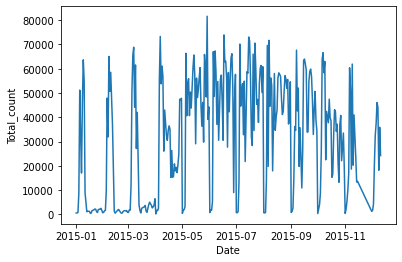

In [34]:
#total count distribution wrt date
sns.lineplot(x = df_new.Date, y= df_new['Total_count'])
plt.show()

# Sanity Checks

In [35]:
df_new

,Date,Total_count
0,2015-01-01,531.0
1,2015-02-01,804.0
2,2015-03-01,774.0
3,2015-04-01,158.0
4,2015-05-01,371.0
5,2015-06-01,728.0
6,2015-07-01,675.0
7,2015-08-01,676.0
8,2015-09-01,731.0
9,2015-10-01,301.0


## Here is the major issue in Date column
1. The issue here is that in each month from 1st to 12th the date format is correct but from 13th to 30th/31st the date format is incorrect.
2. And, we want all the dates in a single format 
3. Remedy to encounter it is to create a another column of date with the desired range, which is the easier method than others.
4. So we created another column for the required date range
5. And, dropped the initial date column

In [36]:
df_new['Date_final'] = pd.date_range(start='1/1/2015', periods=len(df_new), freq='D')

In [37]:
df_new

,Date,Total_count,Date_final
0,2015-01-01,531.0,2015-01-01
1,2015-02-01,804.0,2015-01-02
2,2015-03-01,774.0,2015-01-03
3,2015-04-01,158.0,2015-01-04
4,2015-05-01,371.0,2015-01-05
5,2015-06-01,728.0,2015-01-06
6,2015-07-01,675.0,2015-01-07
7,2015-08-01,676.0,2015-01-08
8,2015-09-01,731.0,2015-01-09
9,2015-10-01,301.0,2015-01-10


In [38]:
df_new = df_new.drop(['Date'], axis=1)

In [39]:
df_new = df_new.rename(columns = {'Date_final': 'Date'})

In [40]:
df_new.head()

,Total_count,Date
0,531.0,2015-01-01
1,804.0,2015-01-02
2,774.0,2015-01-03
3,158.0,2015-01-04
4,371.0,2015-01-05


In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Total_count  319 non-null    float64       
 1   Date         319 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.1 KB


In [42]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   Max Temp (°C)              365 non-null    float64       
 2   Min Temp (°C)              365 non-null    float64       
 3   Mean Temp (°C)             365 non-null    float64       
 4   Heat Deg Days (°C)         365 non-null    float64       
 5   Cool Deg Days (°C)         365 non-null    float64       
 6   Total Rain (mm)            365 non-null    float64       
 7   Total Snow (cm)            365 non-null    float64       
 8   Total Precip (mm)          365 non-null    float64       
 9   Snow on Grnd (cm)          365 non-null    float64       
 10  Dir of Max Gust (10s deg)  365 non-null    float64       
 11  Spd of Max Gust (km/h)     365 non-null    int64         
dtypes: datet

In [43]:
weather.head()

,Date,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2015-01-01,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,63
1,2015-01-02,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,50
2,2015-01-03,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.0,41
3,2015-01-04,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.0,69
4,2015-01-05,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.0,74


# Merging both the datasets on 'Date'

#### By merge we can forecast the next 46 days total_count

In [44]:
# merging data set
final_df = pd.merge(weather, df_new, on='Date', how='left')

In [45]:
final_df.shape

(365, 13)

In [46]:
final_df.head()

,Date,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),Total_count
0,2015-01-01,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,63,531.0
1,2015-01-02,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,50,804.0
2,2015-01-03,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.0,41,774.0
3,2015-01-04,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.0,69,158.0
4,2015-01-05,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.0,74,371.0


In [47]:
# made date column index 
final_df = final_df.set_index('Date')
final_df.head()

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),Total_count
Date,,,,,,,,,,,,
2015-01-01,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,63,531.0
2015-01-02,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,50,804.0
2015-01-03,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.0,41,774.0
2015-01-04,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.0,69,158.0
2015-01-05,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.0,74,371.0


In [48]:
# sorted dataframe based on date
final_df.sort_index(inplace=True)

# Bi-Variate Analysis

In [49]:
final_df.shape

(365, 12)

In [50]:
final_df.columns

Index(['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)',
       'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'Total_count'],
      dtype='object')

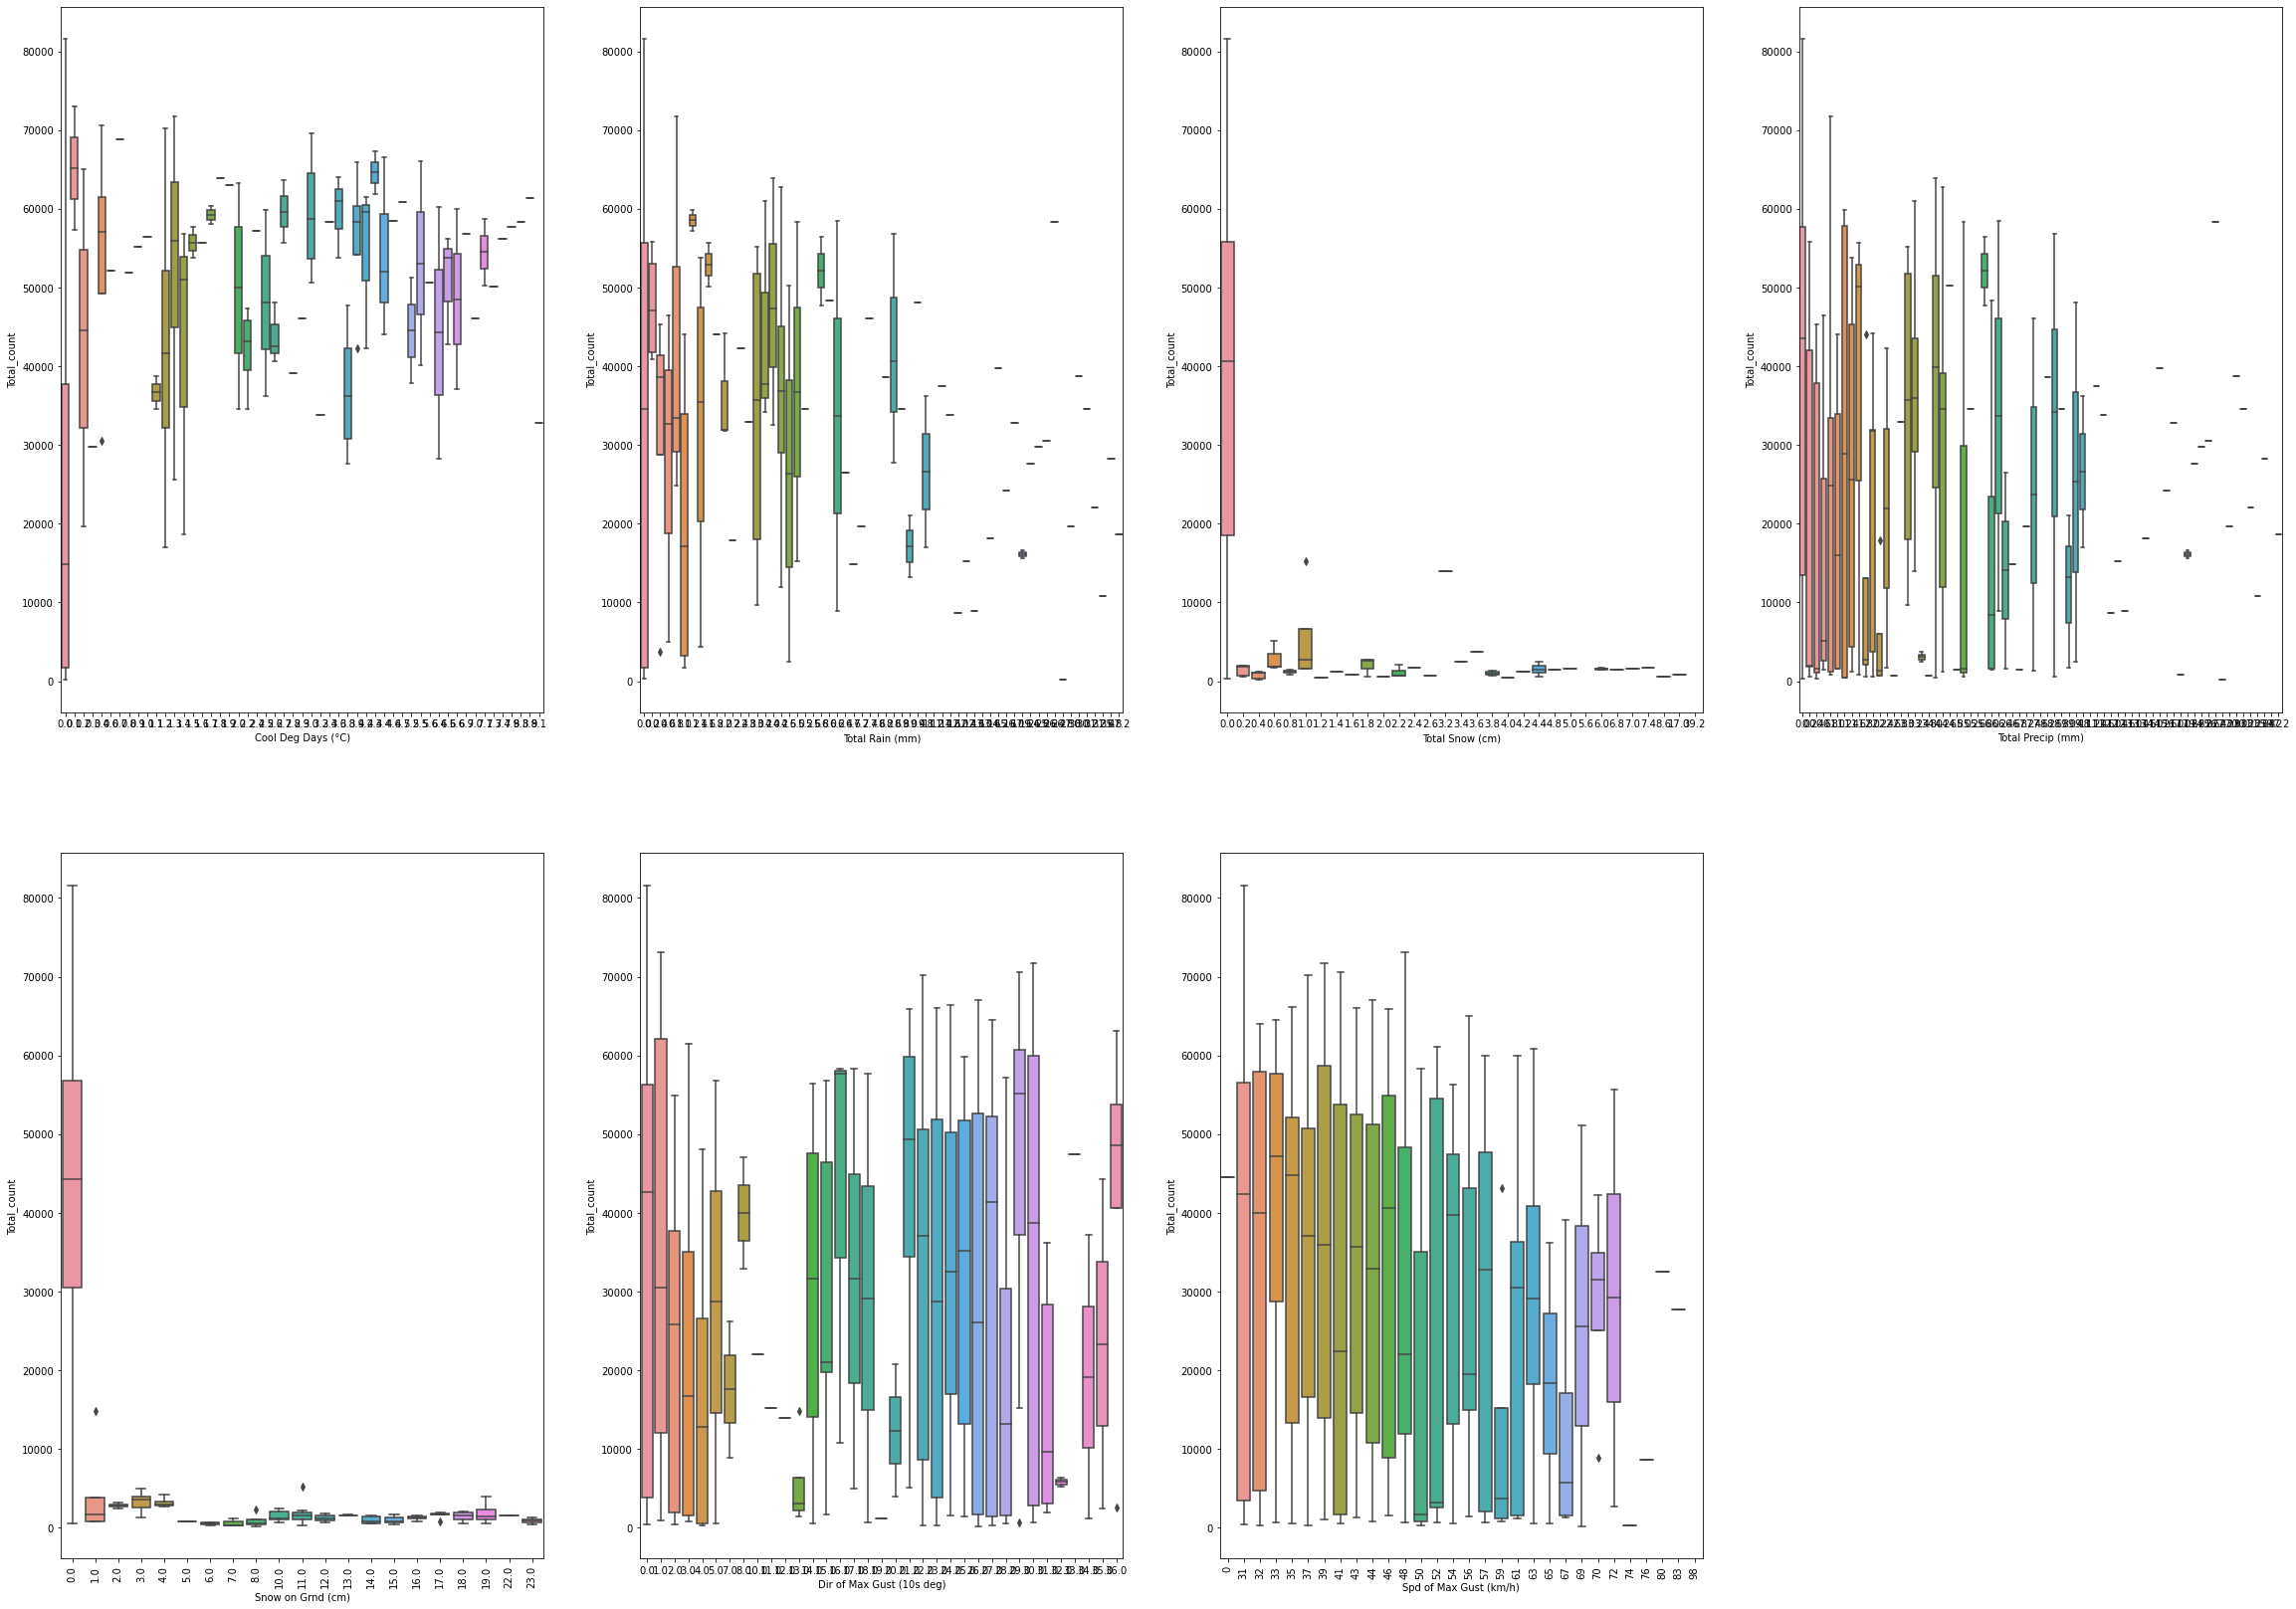

In [51]:
# box-plot creation for variious variables w.r.t Total_count
plt.figure(figsize=(40,60))

plt.subplot(4,4,1)
sns.boxplot(x = final_df['Cool Deg Days (°C)'], y = final_df.Total_count)

plt.subplot(4,4,2)
sns.boxplot(x = final_df['Total Rain (mm)'], y = final_df.Total_count)

plt.subplot(4,4,3)
sns.boxplot(x = final_df['Total Snow (cm)'], y = final_df.Total_count)

plt.subplot(4,4,4)
sns.boxplot(x = final_df['Total Precip (mm)'], y = final_df.Total_count)

plt.subplot(4,4,5)
sns.boxplot(x = final_df['Snow on Grnd (cm)'], y = final_df.Total_count)
plt.xticks(rotation=90)

plt.subplot(4,4,6)
sns.boxplot(x = final_df['Dir of Max Gust (10s deg)'], y = final_df.Total_count)

plt.subplot(4,4,7)
sns.boxplot(x = final_df['Spd of Max Gust (km/h)'], y = final_df.Total_count)
plt.xticks(rotation=90)

plt.xticks(rotation=90)
plt.show()

# Train-Test Split

In [52]:
initial_train_len = 319

train = final_df[:initial_train_len]  # (319,12)
test = final_df[initial_train_len:]   # (46,12)

In [53]:
# as test column has all nulls in Total_count column
test_final = final_df[319:].drop(['Total_count'], axis=1)

# Time Series Analysis

In [54]:
# importing libraries
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 14

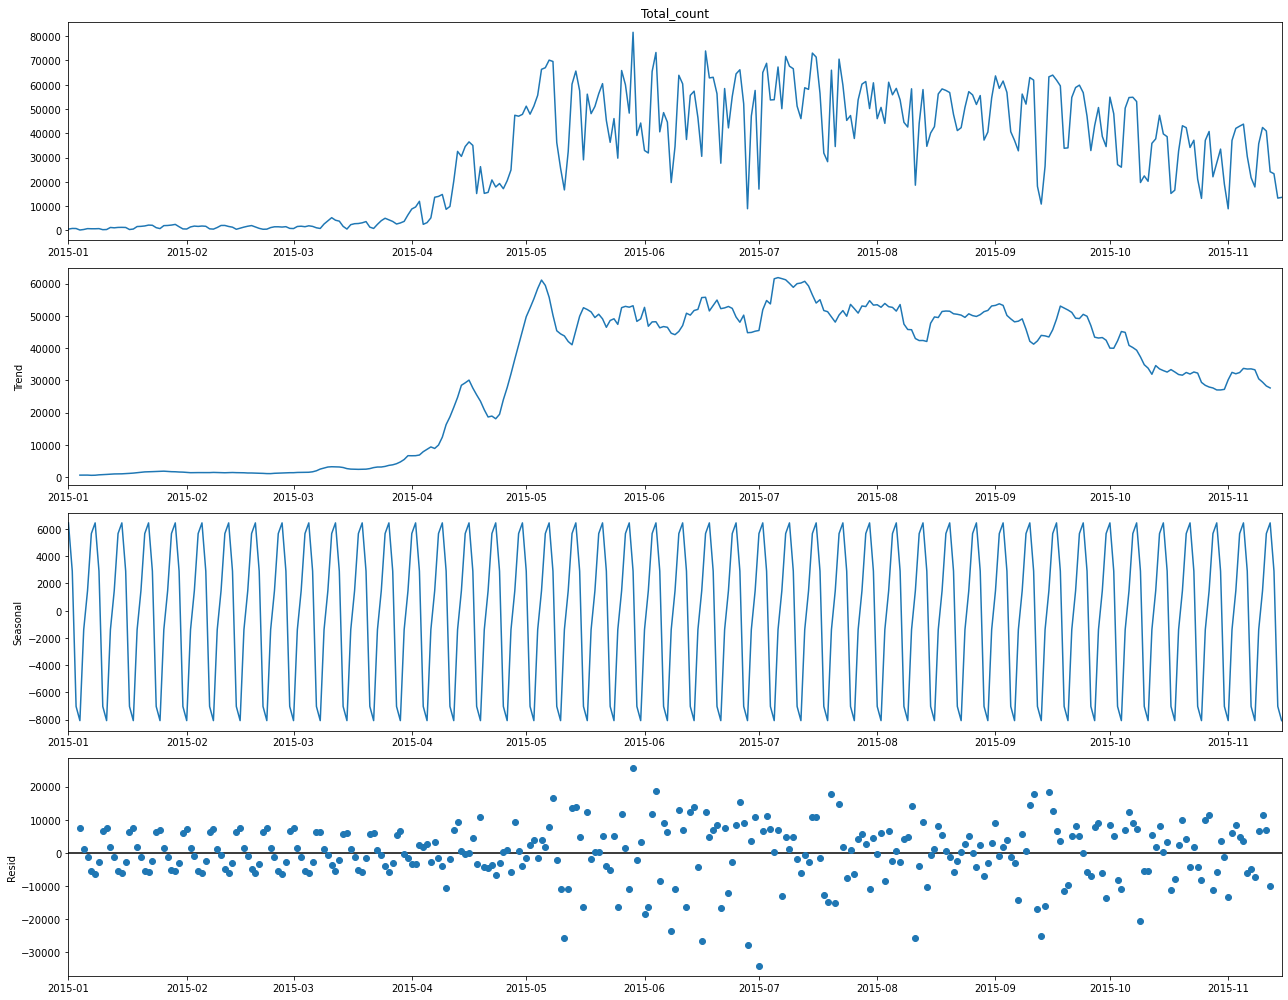

In [55]:
# seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(train['Total_count'], model='additive') 
fig = decomposition.plot()
plt.show()

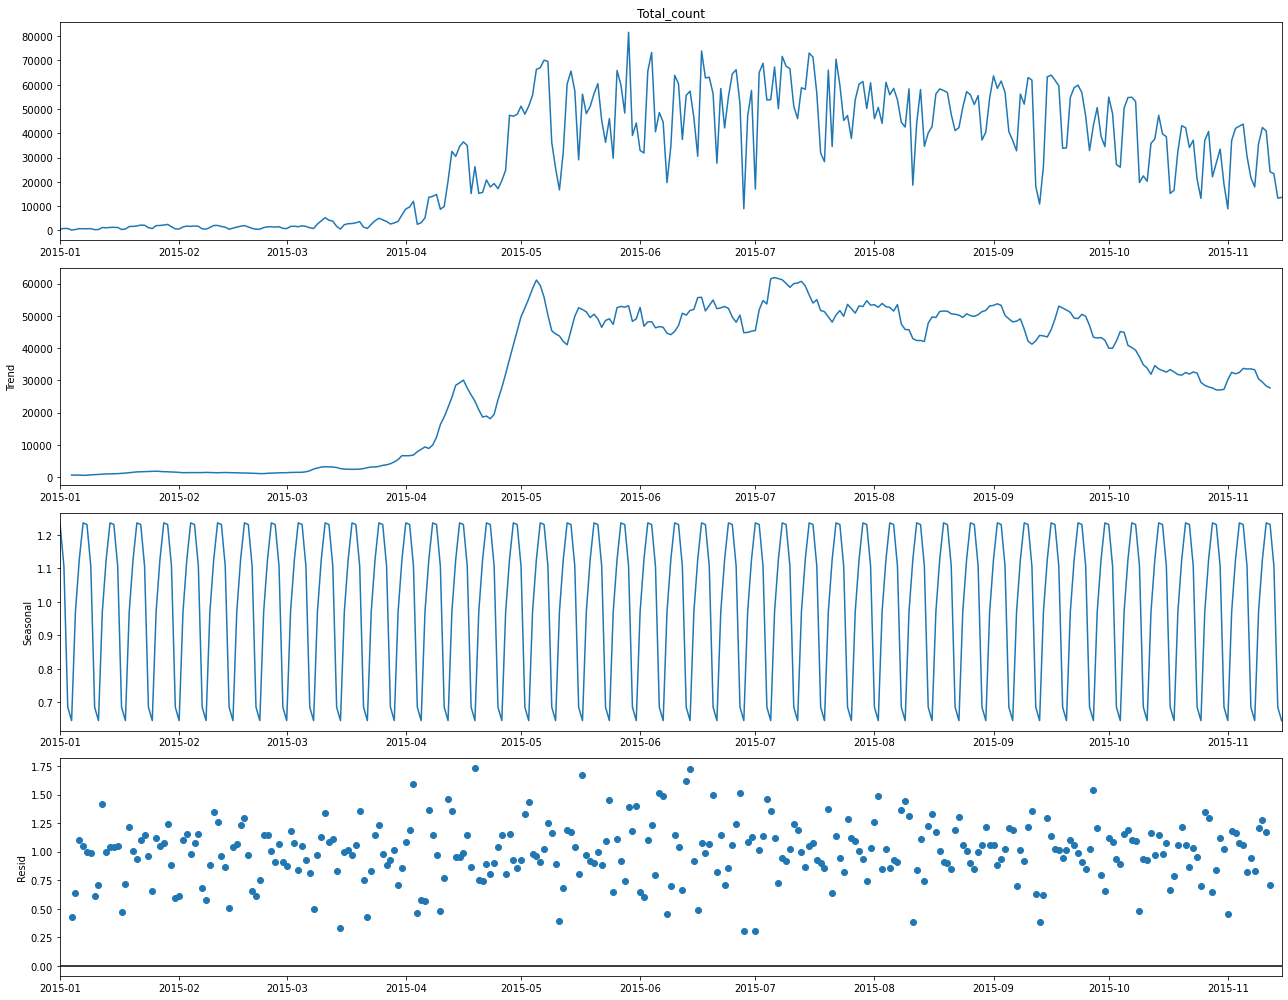

In [56]:
# seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(train['Total_count'], model='multiplicative') 
fig = decomposition.plot()
plt.show()

# Stationarity Tests

## 1. ADF TEST

In [57]:
# importing stationarity tests
from statsmodels.tsa.stattools import adfuller, kpss

In [58]:
# adfuller test
adf_test = adfuller(train.Total_count)
print('ADF Statistics :- ', adf_test[0])
print('Critical Value @ 0.05:- ', adf_test[4]['5%'])
print('p-value:- ', adf_test[1])

if adf_test[0]<adf_test[4]['5%'] and adf_test[1]<0.05:
    print("Series is Stationary")
else:
    print("Series is not Stationary")

ADF Statistics :-  -1.4853734227766702
Critical Value @ 0.05:-  -2.871158406898617
p-value:-  0.5407340910735438
Series is not Stationary


**`Always ADF and KPSS statistics must be lower than their respective Critical Values at 5%`**

In [59]:
#kpss test
kpss_test = kpss(train.Total_count)
print('KPSS Statistics :- ', kpss_test[0])
print('Critical Value @ 0.05:- ', kpss_test[3]['5%'])
print('p-value:- ', kpss_test[1])

if kpss_test[0]<kpss_test[3]['5%'] and kpss_test[1]<0.05:
    print("Series is Stationary")
else:
    print("Series is not Stationary")

KPSS Statistics :-  1.1672580524012497
Critical Value @ 0.05:-  0.463
p-value:-  0.01
Series is not Stationary


### **The series is not stationary**

# Non- Stationary to Stationary

### 1. Box-Cox Transformation

In [60]:
from scipy.stats import boxcox

In [61]:
# Box-cox Transformation
train_boxcox = pd.Series(boxcox(train.Total_count, lmbda= 0), index=train.index)

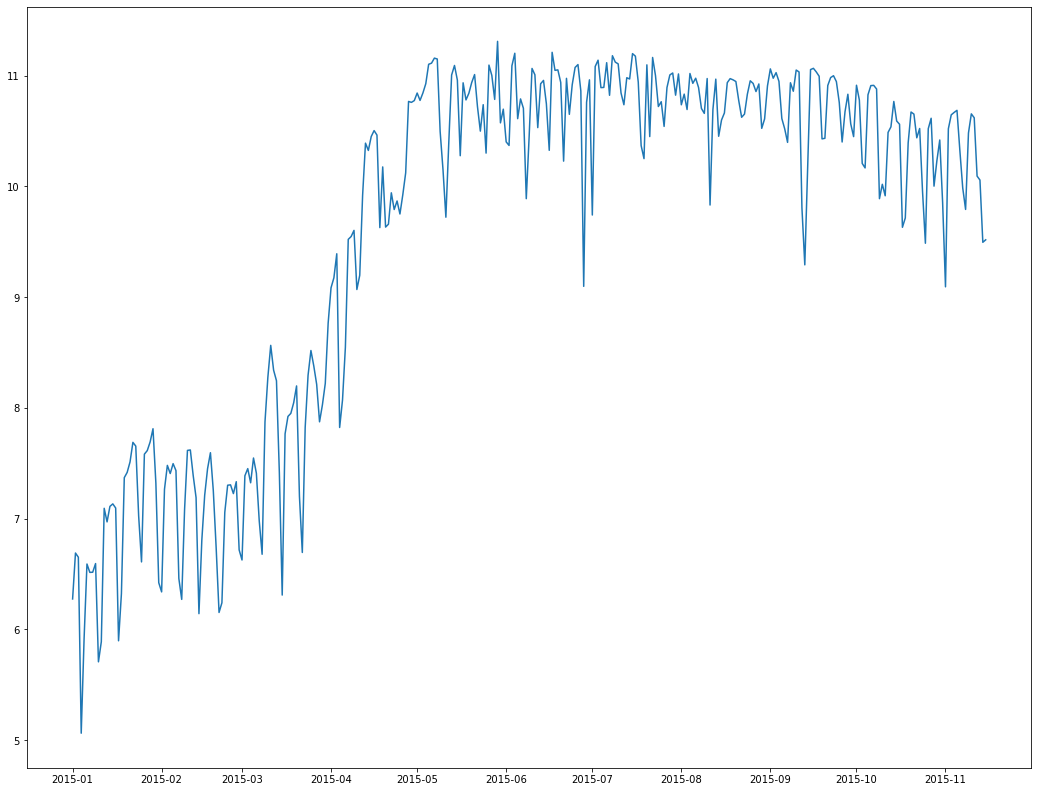

In [62]:
plt.plot(train_boxcox, label= 'After box-cox Transformation')
plt.show()

In [63]:
train_boxcox.head()

Date
2015-01-01    6.274762
2015-01-02    6.689599
2015-01-03    6.651572
2015-01-04    5.062595
2015-01-05    5.916202
dtype: float64

### 2. Differencing

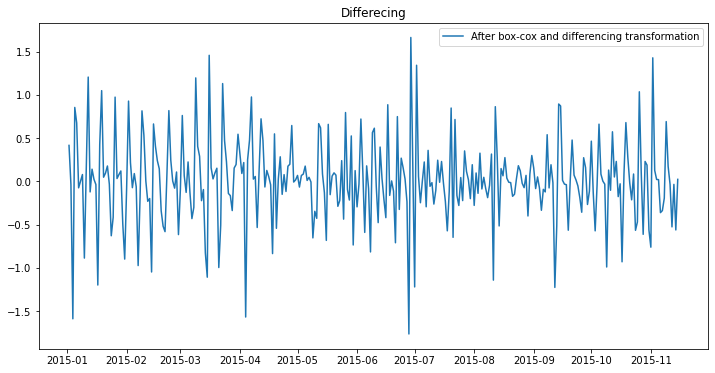

In [64]:
#Differencing the series 
train_boxcox_diff = pd.Series(train_boxcox.diff(), index=train.index)
train_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=[12,6])
plt.plot(train_boxcox_diff, label='After box-cox and differencing transformation')
plt.title('Differecing')
plt.legend(loc = 'best')
plt.show()

## Testing the series again

In [65]:
# adfuller test
adf_test = adfuller(train_boxcox_diff)
print('ADF Statistics :- ', adf_test[0])
print('Critical Value @ 0.05:- ', adf_test[4]['5%'])
print('p-value:- ', adf_test[1])

if adf_test[0]<adf_test[4]['5%'] and adf_test[1]<0.05:
    print("Series is Stationary")
else:
    print("Series is not Stationary")

ADF Statistics :-  -4.6303833691035585
Critical Value @ 0.05:-  -2.871158406898617
p-value:-  0.00011349950421425594
Series is Stationary


In [66]:
#kpss test
kpss_test = kpss(train_boxcox_diff)
print('KPSS Statistics :- ', kpss_test[0])
print('Critical Value @ 0.05:- ', kpss_test[3]['5%'])
print('p-value:- ', kpss_test[1])

if kpss_test[0]<kpss_test[3]['5%'] and kpss_test[1]<0.05:
    print("Series is Stationary")
else:
    print("Series is not Stationary")

KPSS Statistics :-  0.3192989774260102
Critical Value @ 0.05:-  0.463
p-value:-  0.1
Series is not Stationary


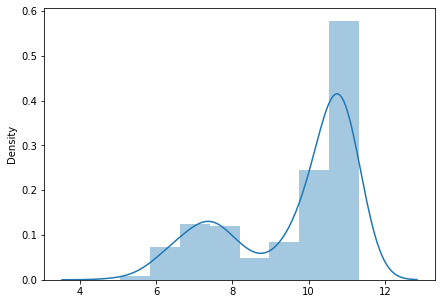

In [67]:
#distribution plot
plt.figure(figsize=(7,5))
sns.distplot(train_boxcox)
plt.show()

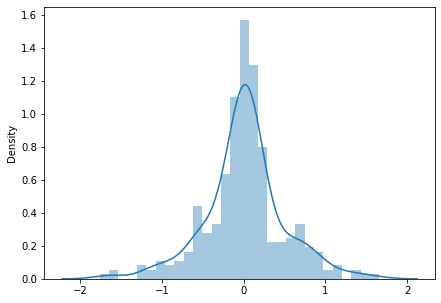

In [68]:
#distribution plot
plt.figure(figsize=(7,5))
sns.distplot(train_boxcox_diff)
plt.show()

## The series is now stationary

# Auto Correlation

## 1. ACF

In [69]:
#importing acf pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

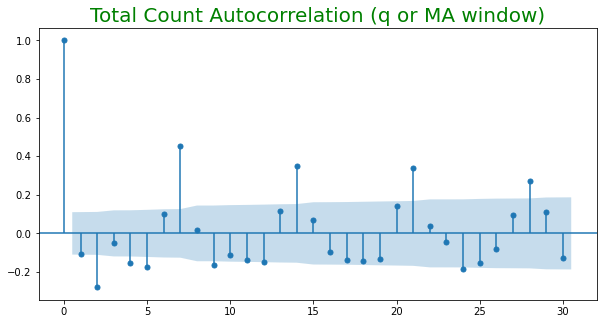

In [70]:
#acf
plt.figure(figsize=[10,5])
plot_acf(train_boxcox_diff, ax=plt.gca(), lags=30)
plt.title("Total Count Autocorrelation (q or MA window)", size=20, color='green')
plt.show()

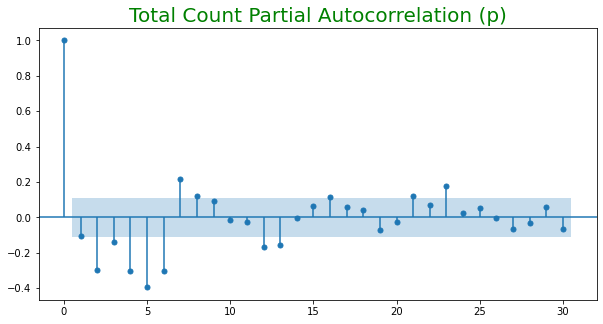

In [71]:
#pacf
plt.figure(figsize=[10,5])
plot_pacf(train_boxcox_diff, ax=plt.gca(), lags=30)
plt.title("Total Count Partial Autocorrelation (p)", size=20, color='green')
plt.show()

- **p:- 5**

- **q or MA window:- 7**

## Another Train Test split for getting perfect model with least MAPE

### We will take that dataframe which consist total count and model based on that dataframe and then calculate MAPE & RMSE and after getting perfect model we will switch to the train & test dataframe

In [72]:
train_initial = train[:273]
train_initial.shape

(273, 12)

In [73]:
test_initial = train[273:]
test_initial.shape

(46, 12)

## Splitting the transformed series

In [74]:
# splitting the series of sales_boxcox
train_total_count = train_boxcox_diff[:272]
test_total_count = train_boxcox_diff[272:]

In [75]:
train_total_count.shape

(272,)

In [76]:
test_total_count.shape

(46,)

# 1. ARIMA

In [77]:
# model import
from statsmodels.tsa.arima_model import ARIMA

In [78]:
model = ARIMA(train_total_count, order=(5,0,7))
model_fit = model.fit()
print(model_fit.params)

const      0.015674
ar.L1.y    0.062212
ar.L2.y   -0.814069
ar.L3.y   -0.267736
ar.L4.y   -0.404966
ar.L5.y   -0.705896
ma.L1.y   -0.547834
ma.L2.y    0.575546
ma.L3.y    0.052248
ma.L4.y   -0.056461
ma.L5.y    0.585898
ma.L6.y   -0.422899
ma.L7.y   -0.000167
dtype: float64


In [79]:
# retrieving the series
y_hat_arima = train_boxcox_diff.copy()

y_hat_arima['arima_forecast_diff'] = model_fit.predict(test_total_count.index.min(), test_total_count.index.max())

y_hat_arima['arima_forecast'] = y_hat_arima['arima_forecast_diff'].cumsum()

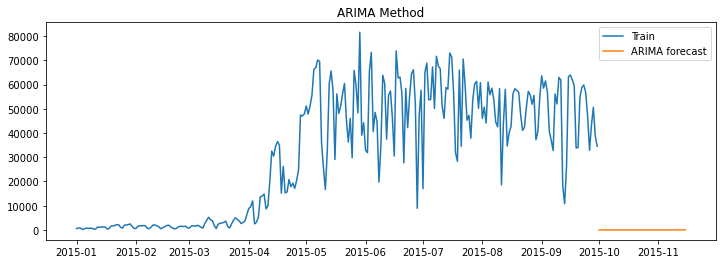

In [80]:
#Total count plot
plt.figure(figsize=(12,4))
plt.plot(train['Total_count'][:273], label='Train')
plt.plot(y_hat_arima['arima_forecast'][test_total_count.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

In [81]:
#importing computations
from sklearn.metrics import mean_squared_error

In [82]:
#calculating errors
rmse = np.sqrt(mean_squared_error(test_total_count, y_hat_arima['arima_forecast'][test_total_count.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_total_count-y_hat_arima['arima_forecast'][test_total_count.index.min():])/test_total_count)*100,2)

tempResults = pd.DataFrame({'Method':['ARIMA method'], 'RMSE': [rmse],'MAPE': [mape] })
result1 = tempResults[['Method', 'RMSE', 'MAPE']]
result1

,Method,RMSE,MAPE
0,ARIMA method,0.72,312.81


# SARIMA

In [83]:
# importing seasonal model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [84]:
model = SARIMAX(train_boxcox_diff, order=(5,0,7), seasonal_order=(5,0,7,12))
model_fit = model.fit()
model_fit.params

ar.L1      -0.094745
ar.L2      -0.684860
ar.L3      -0.503561
ar.L4      -0.280244
ar.L5      -0.858800
ma.L1      -0.395635
ma.L2       0.386219
ma.L3       0.300428
ma.L4      -0.214291
ma.L5       0.662709
ma.L6      -0.407915
ma.L7      -0.031467
ar.S.L12    0.007229
ar.S.L24   -0.326137
ar.S.L36    0.032228
ar.S.L48    0.127861
ar.S.L60    0.134372
ma.S.L12    0.062227
ma.S.L24    0.282859
ma.S.L36    0.039355
ma.S.L48   -0.107772
ma.S.L60   -0.160156
ma.S.L72   -0.074769
ma.S.L84   -0.050928
sigma2      0.119012
dtype: float64

In [85]:
# retrieving the series

y_hat_sarima = train_boxcox_diff.copy()

y_hat_sarima['sarima_forecast_diff'] = model_fit.predict(train_boxcox_diff.index.min(), train_boxcox_diff.index.max())

y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_diff'])

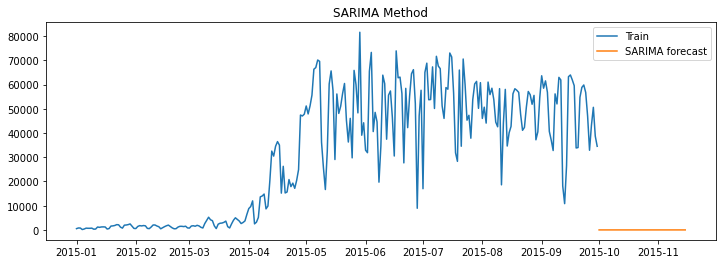

In [86]:
#total_count plot
plt.figure(figsize=(12,4))
plt.plot(train['Total_count'][:273], label='Train')
plt.plot(y_hat_sarima['sarima_forecast'][test_total_count.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('SARIMA Method')
plt.show()

In [87]:
#calculating errors
rmse = np.sqrt(mean_squared_error(test_total_count, y_hat_sarima['sarima_forecast'][test_total_count.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_total_count-y_hat_sarima['sarima_forecast'][test_total_count.index.min():])/test_total_count)*100,2)

tempResults = pd.DataFrame({'Method':['SARIMA method'], 'RMSE': [rmse],'MAPE': [mape] })
result2 = tempResults[['Method', 'RMSE', 'MAPE']]
result2

,Method,RMSE,MAPE
0,SARIMA method,1.11,810.94


# Simple Average Method

In [88]:
y_hat_avg = test_initial.copy()

In [89]:
y_hat_avg['avg_forecast'] = train_initial.Total_count.mean()

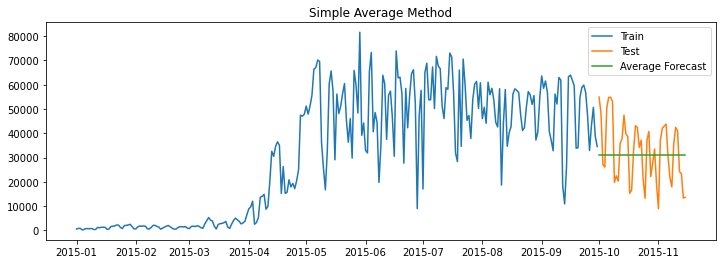

In [90]:
# plotting
plt.figure(figsize=[12,4])
plt.plot(train_initial['Total_count'], label='Train')
plt.plot(test_initial['Total_count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [91]:
#calculating errors
rmse = np.sqrt(mean_squared_error(test_initial['Total_count'], y_hat_avg['avg_forecast'][test_initial['Total_count'].index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_initial['Total_count']-y_hat_avg['avg_forecast'][test_initial['Total_count'].index.min():])/test_initial['Total_count'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Average method'], 'RMSE': [rmse],'MAPE': [mape] })
result3 = tempResults[['Method', 'RMSE', 'MAPE']]
result3

,Method,RMSE,MAPE
0,Simple Average method,12705.32,43.77


# Simple Moving Average

In [92]:
y_hat_sma = final_df.copy()

In [93]:
#moving avg modelling
ma_window = 12
y_hat_sma['sma_forecast'] = final_df['Total_count'].rolling(ma_window).mean()

In [94]:
y_hat_sma['sma_forecast'][319:] = y_hat_sma['sma_forecast'][319-1]

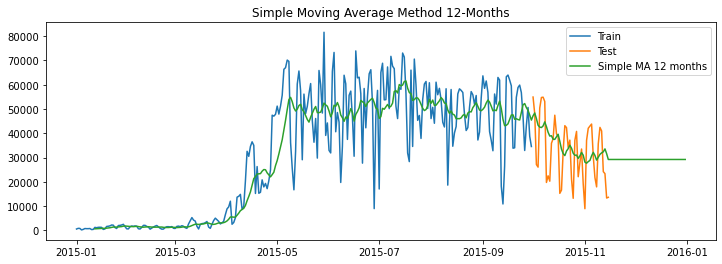

In [95]:
#plotting
plt.figure(figsize=[12,4])
plt.plot(train_initial['Total_count'], label='Train')
plt.plot(test_initial['Total_count'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple MA 12 months')
plt.legend(loc='best')
plt.title("Simple Moving Average Method 12-Months")
plt.show()

# Simple Exponential Method

In [96]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 

In [97]:
#modelling
model = SimpleExpSmoothing(train_initial.Total_count)
model_fit = model.fit(smoothing_level= 0.2, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 531.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [98]:
y_hat_ses = test_initial.copy()

In [99]:
y_hat_ses['ses_forecast'] = model_fit.forecast(46)

# we are forecasting for next 46 days

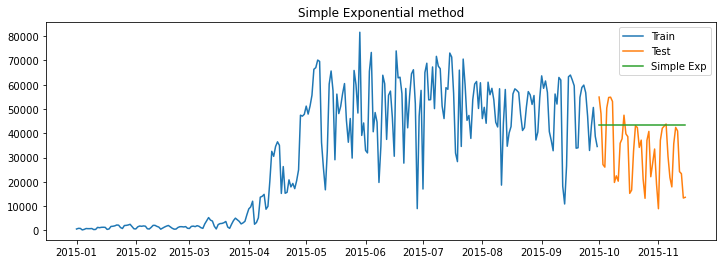

In [100]:
#plotting
plt.figure(figsize=[12,4])
plt.plot(train_initial['Total_count'], label='Train')
plt.plot(test_initial['Total_count'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple Exp')
plt.legend(loc='best')
plt.title("Simple Exponential method")
plt.show()

In [101]:
#errors
rmse = np.sqrt(mean_squared_error(test_initial.Total_count, y_hat_ses['ses_forecast'])).round(2)

mape = np.round(np.mean(np.abs(test_initial.Total_count-y_hat_ses.ses_forecast) / (test_initial.Total_count)*100),2)

tempResults = pd.DataFrame({'Method':['Simple Exponential method'], 'RMSE': [rmse],'MAPE': [mape] })
result5 = tempResults[['Method', 'RMSE', 'MAPE']]
result5

,Method,RMSE,MAPE
0,Simple Exponential method,16631.19,66.96


# Holt's Winter Exponential Method (Additive Method)

In [102]:
y_hat_hwe = test_initial.copy()

In [103]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [104]:
#modelling
model = ExponentialSmoothing(np.asarray(train_initial.Total_count), seasonal_periods=12, trend = 'additive', seasonal='add')

model_fit = model.fit(optimized=True)

print(model_fit.params)

{'smoothing_level': 0.1817857142857143, 'smoothing_trend': 9.999999999999999e-05, 'smoothing_seasonal': 0.00010000000000000002, 'damping_trend': nan, 'initial_level': 31575.91304347826, 'initial_trend': 61.52777777777778, 'initial_seasons': array([-31044.91304348, -30771.91304348, -30801.91304348, -31417.91304348,
       -31204.91304348, -30847.91304348, -30900.91304348, -30899.91304348,
       -30844.91304348, -31274.91304348, -31214.91304348, -30371.91304348]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [105]:
y_hat_hwe['hwe_forecast'] = model_fit.forecast(46)

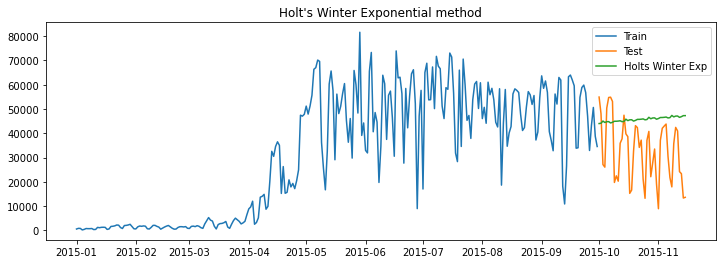

In [106]:
#plotting
plt.figure(figsize=[12,4])
plt.plot(train_initial['Total_count'], label='Train')
plt.plot(test_initial['Total_count'], label='Test')
plt.plot(y_hat_hwe['hwe_forecast'], label='Holts Winter Exp')
plt.legend(loc='best')
plt.title("Holt's Winter Exponential method")
plt.show()

In [107]:
#errors
rmse = np.sqrt(mean_squared_error(test_initial.Total_count,y_hat_hwe['hwe_forecast'] )).round(2)
mape = np.round(np.mean(np.abs( (test_initial.Total_count - y_hat_hwe['hwe_forecast']) / test_initial.Total_count)*100),2)

tempResults = pd.DataFrame({'Method':['Holts Winter Exponential Method'], 'RMSE': [rmse],'MAPE': [mape] })
result6 = tempResults[['Method', 'RMSE', 'MAPE']]
result6

,Method,RMSE,MAPE
0,Holts Winter Exponential Method,18381.78,75.0


# Holt's Winter Exponential Method (Multiplicative Method)

In [108]:
y_hat_hwa = test_initial.copy()

In [109]:
#modelling
model = ExponentialSmoothing(np.asarray(train_initial.Total_count), seasonal_periods=12, trend = 'additive', seasonal='mul')

model_fit = model.fit(optimized=True)

print(model_fit.params)

{'smoothing_level': 0.14642857142857144, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13131868131868132, 'damping_trend': nan, 'initial_level': 31575.91304347826, 'initial_trend': 61.52777777777778, 'initial_seasons': array([0.01681662, 0.02546245, 0.02451236, 0.00500381, 0.01174946,
       0.02305555, 0.02137705, 0.02140872, 0.02315056, 0.00953258,
       0.01143277, 0.03813033]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [110]:
y_hat_hwa['hwa_forecast'] = model_fit.forecast(46)

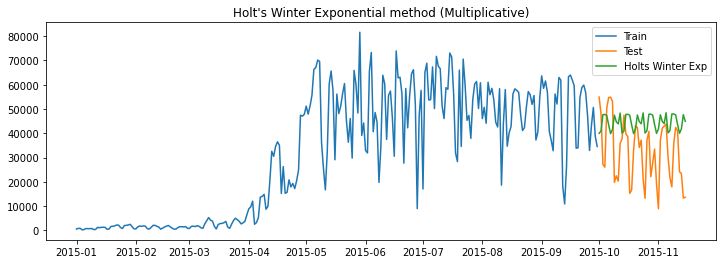

In [111]:
#plotting
plt.figure(figsize=[12,4])
plt.plot(train_initial['Total_count'], label='Train')
plt.plot(test_initial['Total_count'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holts Winter Exp')
plt.legend(loc='best')
plt.title("Holt's Winter Exponential method (Multiplicative)")
plt.show()

In [112]:
#errors
rmse = np.sqrt(mean_squared_error(test_initial.Total_count,y_hat_hwa['hwa_forecast'] )).round(2)
mape = np.round(np.mean(np.abs( (test_initial.Total_count - y_hat_hwa['hwa_forecast']) / test_initial.Total_count)*100),2)

tempResults = pd.DataFrame({'Method':['Holts Winter Exponential Method'], 'RMSE': [rmse],'MAPE': [mape] })
result7 = tempResults[['Method', 'RMSE', 'MAPE']]
result7

,Method,RMSE,MAPE
0,Holts Winter Exponential Method,17746.32,71.17


In [113]:
#calculating errors
result = pd.concat([result1, result2, result3, result5, result6, result7])
result = result.sort_values(by=['MAPE','RMSE'], ascending=True)
result = result.set_index('Method')

styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "140%"),
                              ("color", 'green')])]

result = result.style.set_caption("Customer RMSE & MAPE Table").set_table_styles(styles)
result

,RMSE,MAPE
Method,,
Simple Average method,12705.320000,43.770000
Simple Exponential method,16631.190000,66.960000
Holts Winter Exponential Method,17746.320000,71.170000
Holts Winter Exponential Method,18381.780000,75.000000
ARIMA method,0.720000,312.810000
SARIMA method,1.110000,810.940000


## Checking all the model we conclude that the ARIMA model is the best as it is giving better results with least errors

## `Final model forecasting using ARIMA Model`
## `Forecasting for next 46 days`

**`train & test_final`**

In [114]:
train_boxcox_diff.shape

(318,)

In [115]:
model = ARIMA(train_boxcox_diff, order=(5,0,7))
model_fit = model.fit()
print(model_fit.params)

const      0.011876
ar.L1.y    0.012467
ar.L2.y   -0.781764
ar.L3.y   -0.348058
ar.L4.y   -0.359246
ar.L5.y   -0.764327
ma.L1.y   -0.513022
ma.L2.y    0.533541
ma.L3.y    0.111730
ma.L4.y   -0.106611
ma.L5.y    0.619647
ma.L6.y   -0.432936
ma.L7.y   -0.000113
dtype: float64


In [116]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  318
Model:                     ARMA(5, 7)   Log Likelihood                -118.202
Method:                       css-mle   S.D. of innovations              0.348
Date:                Thu, 08 Jun 2023   AIC                            264.403
Time:                        17:00:57   BIC                            317.072
Sample:                    01-02-2015   HQIC                           285.440
                         - 11-15-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0119      0.007      1.617      0.106      -0.003       0.026
ar.L1.y        0.0125      0.185      0.068      0.946      -0.350       0.374
ar.L2.y       -0.7818      0.171     -4.566      0.000      -1.117      -0.446
ar.L3.y       -0.3481      0.266     -1.309      0.190      -0.869       0.173
ar.L4.y       -0.3592      0.141     -2.550      0.011      -0.635      -0.083
ar.L5.y       -0.7643      0.165     -4.636      0.000      -1.087      -0.441
ma.L1.y       -0.5130      0.193     -2.657      0.008      -0.891      -0.135
ma.L2.y        0.5335      0.267      1.998      0.046       0.010       1.057
ma.L3.y        0.1117      0.296      0.378      0.705      -0.468       0.691
ma.L4.y       -0.1066      0.179     -0.595      0.552      -0.458       0.244
ma.L5.y        0.6196      0.126      4.920      0.000       0.373       0.867
ma.L6.y       -0.4329      0.094     -4.618      0.000      -0.617      -0.249
ma.L7.y       -0.0001      0.080     -0.001      0.999      -0.157       0.157
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6258           -0.7831j            1.0025           -0.1427
AR.2            0.6258           +0.7831j            1.0025            0.1427
AR.3           -0.2278           -0.9882j            1.0141           -0.2861
AR.4           -0.2278           +0.9882j            1.0141            0.2861
AR.5           -1.2659           -0.0000j            1.2659           -0.5000
MA.1           -1.1169           -0.0000j            1.1169           -0.5000
MA.2           -0.2263           -1.0369j            1.0613           -0.2842
MA.3           -0.2263           +1.0369j            1.0613            0.2842
MA.4            0.6664           -0.8104j            1.0492           -0.1405
MA.5            0.6664           +0.8104j            1.0492            0.1405
MA.6            1.6674           -0.0000j            1.6674           -0.0000
MA.7        -3825.9209           -0.0000j         3825.9209           -0.5000
-----------------------------------------------------------------------------
"""

In [117]:
# retrieving the series
y_hat_arima = train_boxcox_diff.copy()

y_hat_arima['arima_forecast_diff'] = model_fit.predict(test_final.index.min(), test_final.index.max())

y_hat_arima['arima_forecast'] = y_hat_arima['arima_forecast_diff'].cumsum()

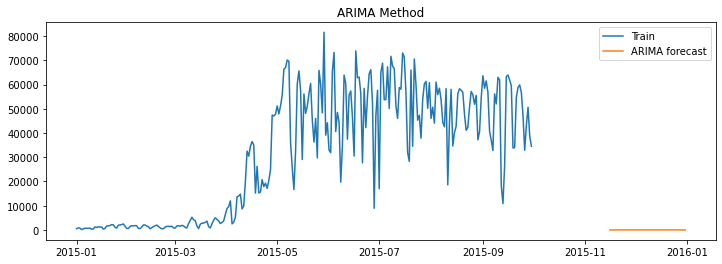

In [118]:
#Total count plot
plt.figure(figsize=(12,4))
plt.plot(train['Total_count'][:273], label='Train')
plt.plot(y_hat_arima['arima_forecast'][test_final.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

# Summary (After Forecasting)

> As we have already observed that the best model for the given problem is found to be **`ARIMA`**  as it is giving the lowest **RMSE** and  **MAPE**.
Taking this train of thought further we made predictions for next 46 days after the data concluded.

## As we can see that the predicted data not only coincides with the data provided but also captures the features of the previous data.

- There is a clearly visible seasonality present in the predicted data.
- There is an everpresent linearity througout the data which is also visible in the predictions.
- The model was able to accurately match the flow of trend that was present in the training data without overfitting.

observing the performance by the model we can conclude that for the problem at hand, the predictions made by **ARIMA model** are acceptable w.r.t. other models.
